#                                             Titanic survived Project

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
df_titanic=pd.read_csv(r"C:\Users\chaud\Downloads\titanic_train.csv")
df_titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
df_titanic.shape

(891, 12)

In [6]:
df_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df_titanic.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

Checking Null Values

In [11]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

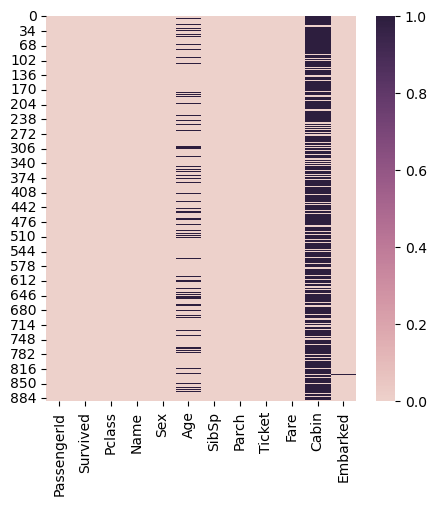

In [12]:
plt.figure(figsize = (5,5))
sns.heatmap(df_titanic.isnull(), cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

In [13]:
percent_missing = df_titanic.isnull().sum() * 100 / len(df_titanic)
print(pd.DataFrame({'percent_missing': percent_missing}))

             percent_missing
PassengerId         0.000000
Survived            0.000000
Pclass              0.000000
Name                0.000000
Sex                 0.000000
Age                19.865320
SibSp               0.000000
Parch               0.000000
Ticket              0.000000
Fare                0.000000
Cabin              77.104377
Embarked            0.224467


### Observations:-
Feature 'Cabin','Age' and 'Embarked' have null values.

77.10% of 'Cabin' data is null value,19.86% of 'Age' is null value, while 0.22% of 'Embarked' data is null value.

Dropping 'Cabin' since 77.10% of its values is missing and therefore it cannot contribute to building a good model for predicting the target variable values.

In [14]:
df_titanic.drop(columns=['Cabin'],inplace = True)

In [15]:
df_titanic['Age'].fillna(df_titanic['Age'].mean(), inplace=True)

In [16]:
df_titanic['Embarked'].replace(np.NaN, df_titanic['Embarked'].mean,inplace=True)

In [17]:
df_titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<Axes: >

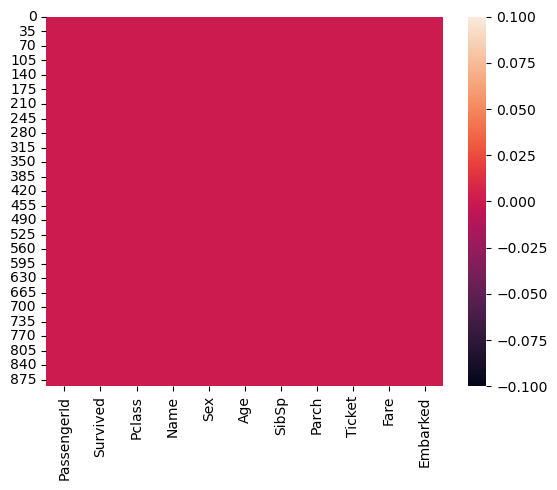

In [18]:
sns.heatmap(df_titanic.isnull())

In [19]:
df_titanic.shape

(891, 11)

We also see, that there are few columns, which are not of much importance in this process. So, dropping PassengerId, Name, Ticket

In [20]:
df_titanic= df_titanic.drop(columns = ['PassengerId','Name','Ticket'],axis=1)

Survived       Axes(0.125,0.53;0.110714x0.35)
Pclass      Axes(0.257857,0.53;0.110714x0.35)
Age         Axes(0.390714,0.53;0.110714x0.35)
SibSp       Axes(0.523571,0.53;0.110714x0.35)
Parch       Axes(0.656429,0.53;0.110714x0.35)
Fare        Axes(0.789286,0.53;0.110714x0.35)
dtype: object

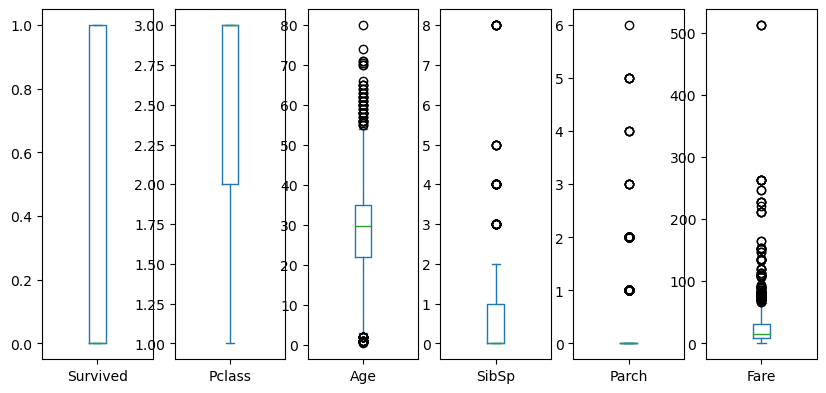

In [21]:
df_titanic.plot(kind='box', subplots=True, layout=(2,6),figsize=(10,10))

### Outliers Detection

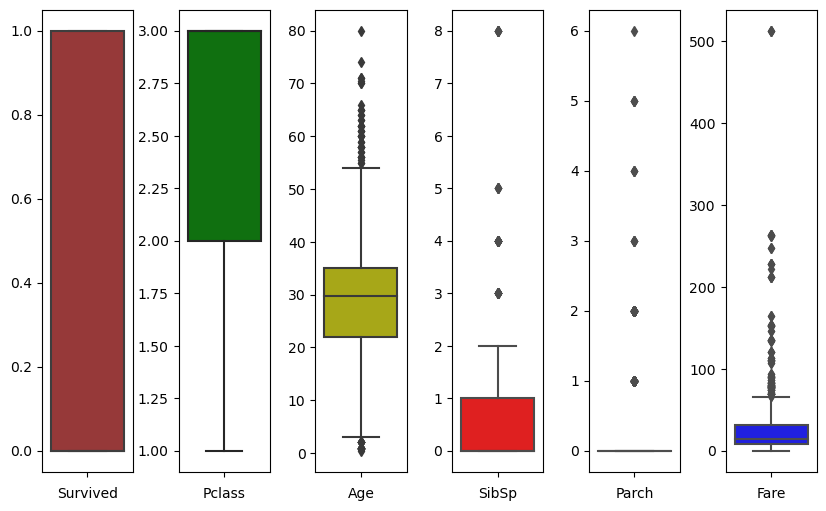

In [22]:
fig, ax = plt.subplots(1, 6, figsize=(10, 6))
 
plt.subplots_adjust(wspace=0.5) 
 
sns.boxplot(data=df_titanic['Survived'], ax=ax[0], color='brown',)
ax[0].set_xlabel('Survived')
 
sns.boxplot(data=df_titanic['Pclass'], ax=ax[1], color='g')
ax[1].set_xlabel('Pclass')
 
sns.boxplot(data=df_titanic['Age'], ax=ax[2], color='y')
ax[2].set_xlabel('Age')
 
sns.boxplot(data=df_titanic['SibSp'], ax=ax[3], color='r')
ax[3].set_xlabel('SibSp')
 
sns.boxplot(data=df_titanic['Parch'], ax=ax[4], color='grey')
ax[4].set_xlabel('Parch')
 
sns.boxplot(data=df_titanic['Fare'], ax=ax[5], color='b')
ax[5].set_xlabel('Fare')
for subplot in ax:
    subplot.set_xticklabels([])
    
plt.show()

From the above boxplots, we can clearly see outliers are present in Age, SibSp, Parch, Fare

In [23]:
df_titanic =df_titanic.filter(['Survived' ,'Pclass'  ,'Age' ,'SibSp' , 'Parch' ,'Fare' ], axis=1) 

### Removing Outliers from the dataset

In [24]:
import scipy.stats as stats
from scipy.stats import zscore
z_scores = stats.zscore(df_titanic)   

In [25]:
from scipy.stats import zscore
z = np.abs(zscore(df_titanic))
z

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0.789272,0.827377,0.592481,0.432793,0.473674,0.502445
1,1.266990,1.566107,0.638789,0.432793,0.473674,0.786845
2,1.266990,0.827377,0.284663,0.474545,0.473674,0.488854
3,1.266990,1.566107,0.407926,0.432793,0.473674,0.420730
4,0.789272,0.827377,0.407926,0.474545,0.473674,0.486337
...,...,...,...,...,...,...
886,0.789272,0.369365,0.207709,0.474545,0.473674,0.386671
887,1.266990,1.566107,0.823344,0.474545,0.473674,0.044381
888,0.789272,0.827377,0.000000,0.432793,2.008933,0.176263
889,1.266990,1.566107,0.284663,0.474545,0.473674,0.044381


In [26]:
threshold = 3
print(np.where(z>3))

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
       119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
       299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
       527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
       689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
       824, 846, 850, 851, 858, 863, 885], dtype=int64), array([4, 3, 4, 5, 3, 3, 3, 3, 4, 5, 2, 2, 5, 3, 3, 3, 4, 3, 3, 3, 3, 3,
       5, 3, 3, 3, 5, 5, 3, 5, 4, 5, 5, 3, 4, 4, 5, 3, 2, 5, 3, 3, 5, 4,
       4, 2, 4, 2, 4, 5, 3, 3, 5, 5, 5, 5, 4, 5, 5, 2, 4, 5, 3, 3, 3, 3,
       3, 3, 2, 4, 3, 4], dtype=int64))


In [27]:
df = df_titanic[(z<3).all(axis =1)]
df

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.000000,1,0,7.2500
1,1,1,38.000000,1,0,71.2833
2,1,3,26.000000,0,0,7.9250
3,1,1,35.000000,1,0,53.1000
4,0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000
887,1,1,19.000000,0,0,30.0000
888,0,3,29.699118,1,2,23.4500
889,1,1,26.000000,0,0,30.0000


In [28]:
df_titanic.shape

(891, 6)

In [29]:
df.shape

(820, 6)

### Correlation of Data

<Axes: >

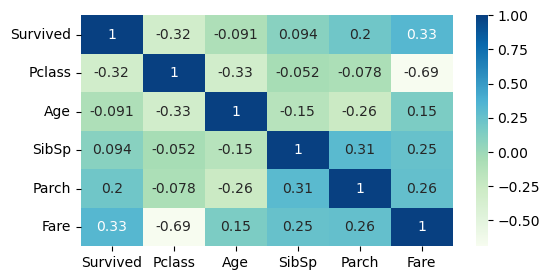

In [30]:
df_titanic = df_titanic[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]

fig, axes = plt.subplots(figsize = (6,3))
sns.heatmap(df.corr(), cmap = 'GnBu',annot=True)

In [31]:
df_titanic.skew()

Pclass     -0.630548
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Survived    0.478523
dtype: float64

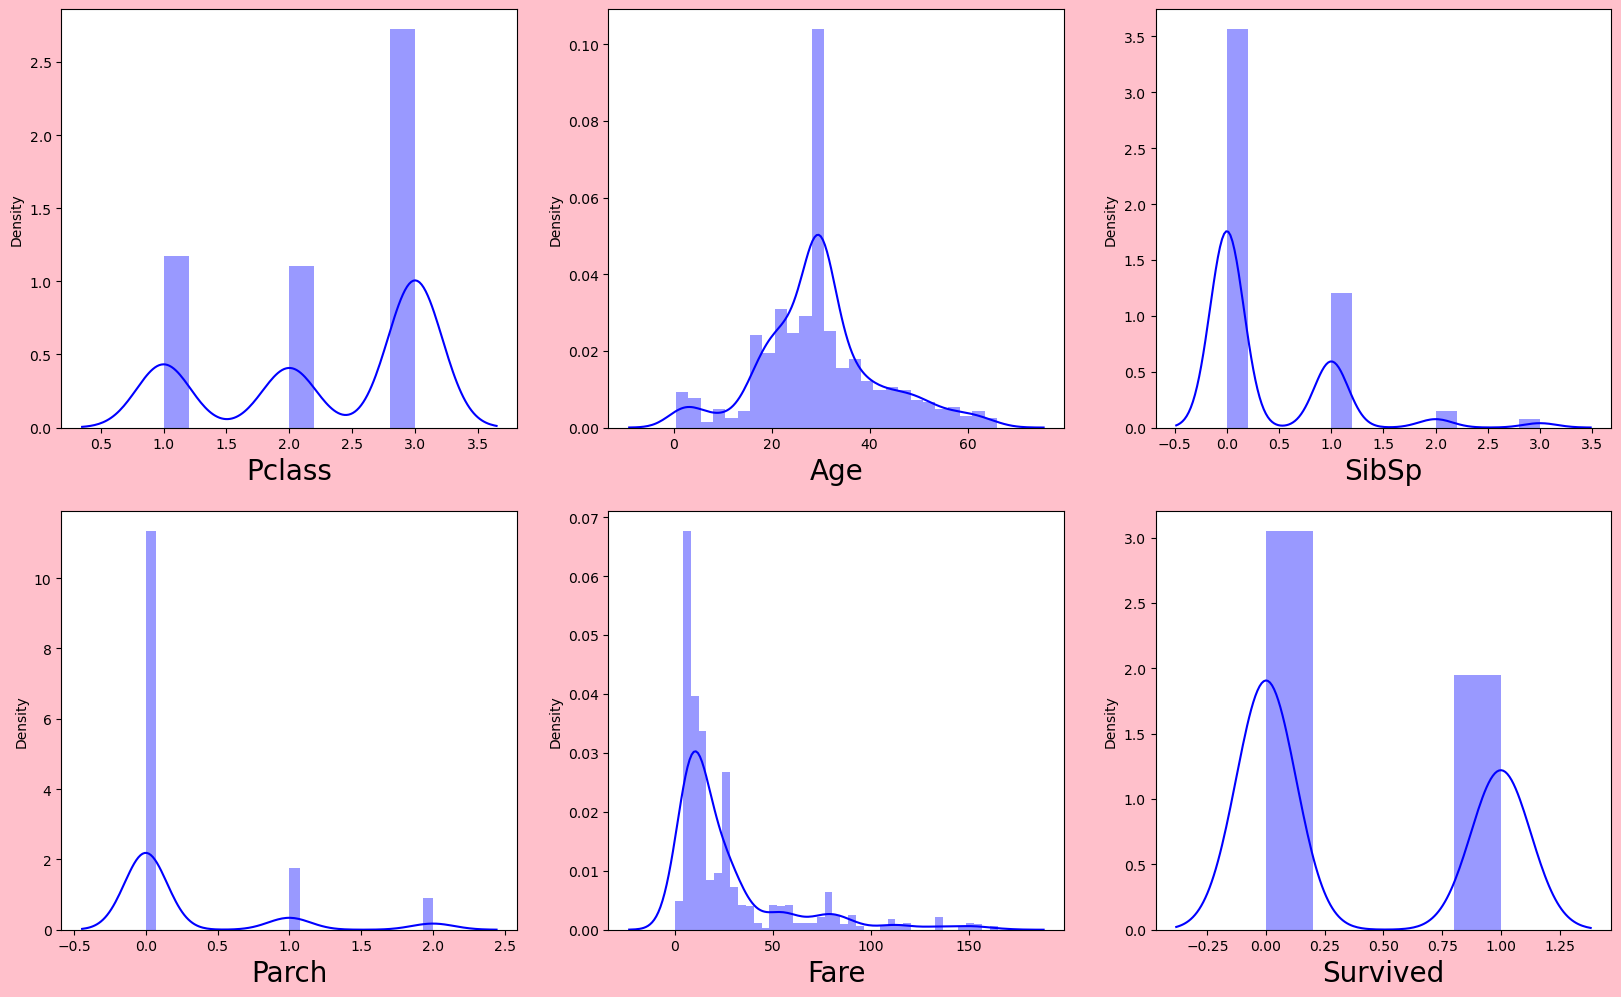

In [39]:
plt.figure(figsize=(20,25), facecolor='pink')
plotnumber =1
for column in df_titanic:
    if plotnumber <=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(df[column], color='b')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

### Splitting the data

In [33]:
X = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
y = df['Survived']

In [34]:
X.shape

(820, 5)

In [35]:
y.shape

(820,)

In [36]:
y.value_counts()

0    500
1    320
Name: Survived, dtype: int64

### Machine Learning Algorithm

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, Y_train, Y_test=train_test_split(X,y,test_size=0.2)

In [117]:
clf=DecisionTreeClassifier()

In [118]:
clf.fit(X_train,Y_train)

DecisionTreeClassifier()

In [119]:
Y_pred=clf.predict(X_test)

In [120]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.6829268292682927

In [121]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [122]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(50,300):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,y,test_size = 0.2, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.7804878048780488 on Random_state 231


In [131]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2, random_state=2)
model = LogisticRegression()
model.fit(X_train, Y_train)
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.7103658536585366


In [127]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.7195121951219512


### Final Prediction

In [129]:
input_data = (3,35,0,0,8.05)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
if prediction[0]==0:
    print("Dead")
if prediction[0]==1:
    print("Alive")


Dead
